# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide


### Jupyter Notebook in VS Code

From directory with virtual environment in it, use this terminal command to use Jupyter Notebook in VS Code:

jupyter notebook --NotebookApp.allow_origin='*' --NotebookApp.ip='0.0.0.0'

### Select Python Interpreter

Open Command Palette as follows: Ctrl+Shift+P

Then select from VS Code Command Palette: "Python: Select Interpreter" and choose the same Python interpreter that you used to install Jupyter.

If server not shown, enter server manually as follows: 
http://localhost:8888

Reminder:  pw: ""

# Chapter 0

In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter0()
# This is needed to render the plots in this chapter
from plots.chapter0 import *

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Visualizing Gradient Descent

## Model

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

x[:5]: [[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]]
y[:5]: [[1.75778494]
 [2.87152788]
 [2.47316396]
 [1.99856008]
 [1.29007009]]


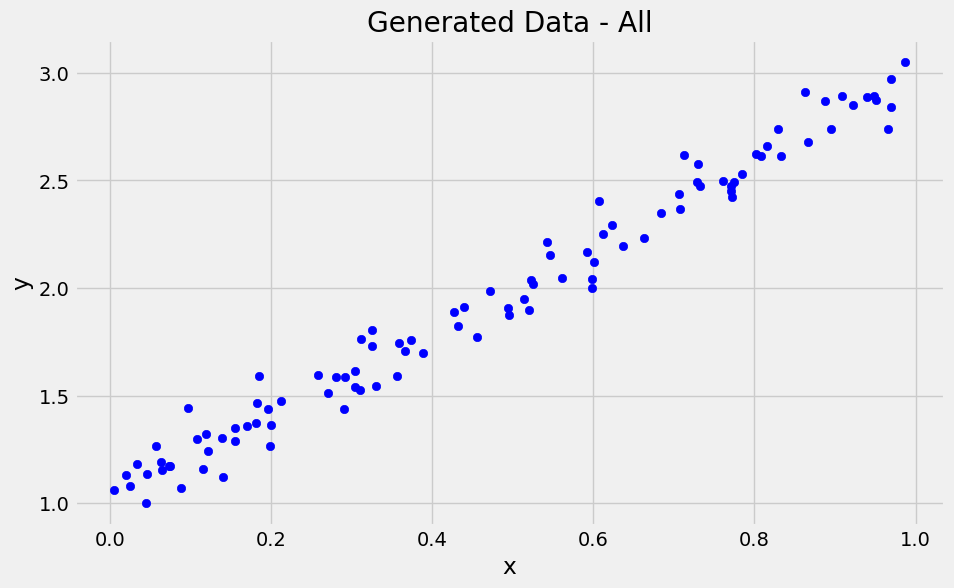

In [4]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)  # for reproducibility
# Generate N random numbers from uniform distribution in [0, 1)
x = np.random.rand(N, 1)  # N rows, 1 column random numbers uniformly distributed

# Generate noise epsilon is a 2D array with shape (N, 1)
# Generates random numbers from normal distribution with mean 0 and std 0.1
epsilon = (.1 * np.random.randn(N, 1))  
y = true_b + true_w * x + epsilon

# Print the first 5 rows of x and y
print("x[:5]:", x[:5])
print("y[:5]:", y[:5])

# plot the data using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.title('Generated Data - All')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Train-Validation-Test Split

In [5]:
# Shuffles the indices
idx = np.arange(N)  # Creates an array of indices from 0 to N-1
np.random.shuffle(idx) # Shuffles the indices randomly

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

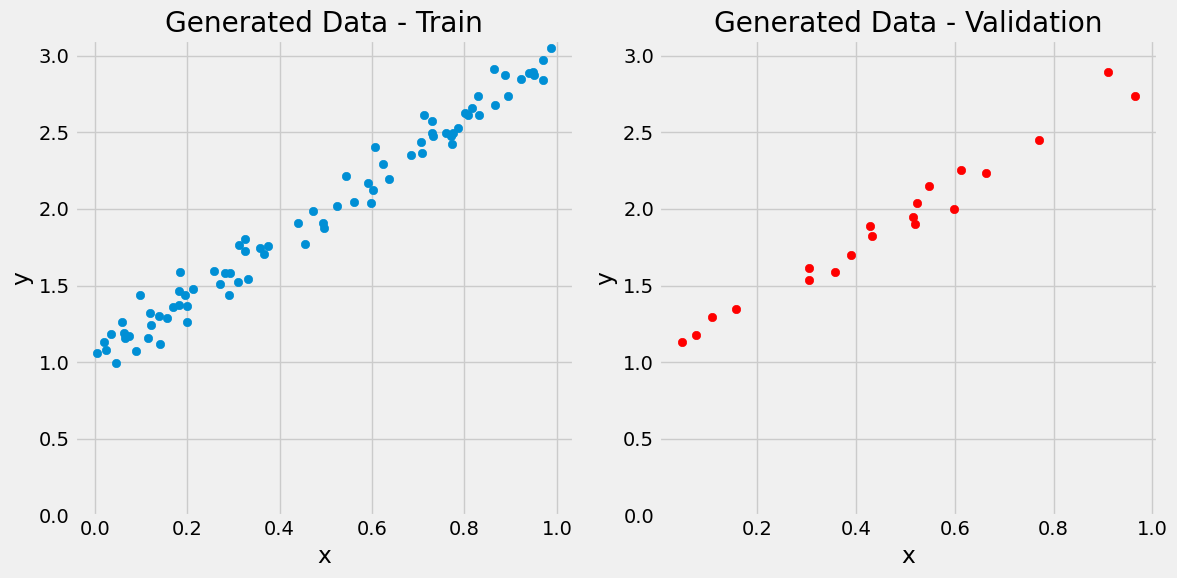

In [7]:
figure1(x_train, y_train, x_val, y_val)

## Step 0: Random Initialization

In [8]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)  # Random number from normal distribution
w = np.random.randn(1)  # Random number from normal distribution

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

In [9]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train  # uses Numpy broadcasting

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

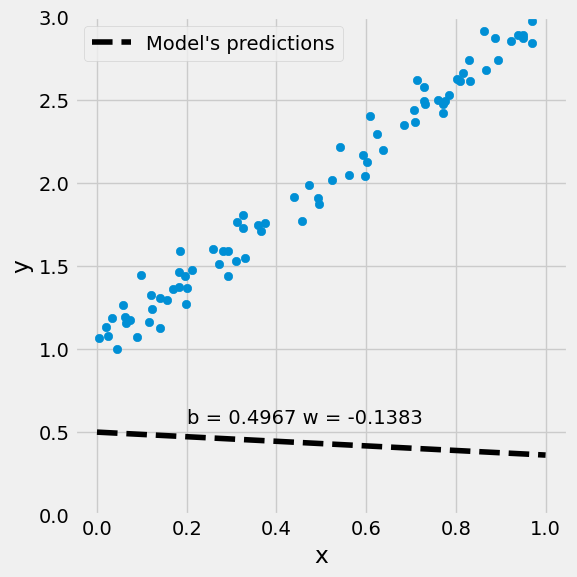

In [10]:
figure2(x_train, y_train, b, w)

## Step 2: Compute the Loss

$$
\Large \text{error}_i = \hat{y_i} - y_i
$$

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

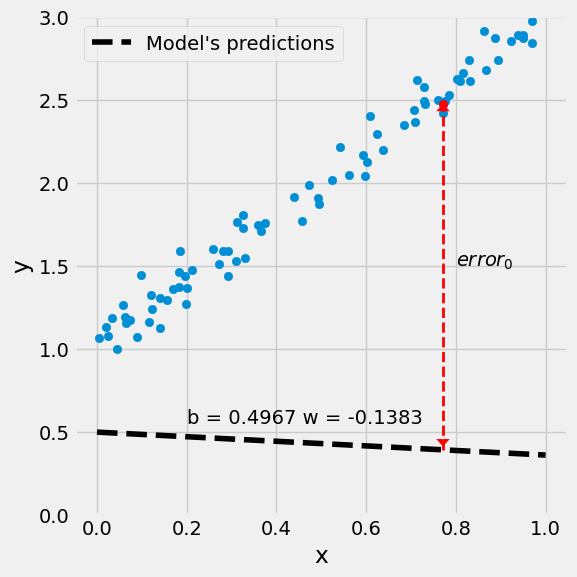

In [11]:
figure3(x_train, y_train, b, w)

$$
\Large
\begin{aligned}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^n{\text{error}_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

In [14]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)  # Uses Numpy broadcasting

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


### Loss Surface

In [15]:
# Reminder:
# true_b = 1
# true_w = 2

# Create a range of values for b and w
# The range is from true_b - 3 to true_b + 3 and from true_w - 3 to true_w + 3
# The range is divided into 101 evenly spaced intervals
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
print(b_range)
print(w_range)

# meshgrid is a handy function that generates a grid of b and w
# values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
print(bs)
print(ws)
bs.shape, ws.shape

[-2.   -1.94 -1.88 -1.82 -1.76 -1.7  -1.64 -1.58 -1.52 -1.46 -1.4  -1.34
 -1.28 -1.22 -1.16 -1.1  -1.04 -0.98 -0.92 -0.86 -0.8  -0.74 -0.68 -0.62
 -0.56 -0.5  -0.44 -0.38 -0.32 -0.26 -0.2  -0.14 -0.08 -0.02  0.04  0.1
  0.16  0.22  0.28  0.34  0.4   0.46  0.52  0.58  0.64  0.7   0.76  0.82
  0.88  0.94  1.    1.06  1.12  1.18  1.24  1.3   1.36  1.42  1.48  1.54
  1.6   1.66  1.72  1.78  1.84  1.9   1.96  2.02  2.08  2.14  2.2   2.26
  2.32  2.38  2.44  2.5   2.56  2.62  2.68  2.74  2.8   2.86  2.92  2.98
  3.04  3.1   3.16  3.22  3.28  3.34  3.4   3.46  3.52  3.58  3.64  3.7
  3.76  3.82  3.88  3.94  4.  ]
[-1.   -0.94 -0.88 -0.82 -0.76 -0.7  -0.64 -0.58 -0.52 -0.46 -0.4  -0.34
 -0.28 -0.22 -0.16 -0.1  -0.04  0.02  0.08  0.14  0.2   0.26  0.32  0.38
  0.44  0.5   0.56  0.62  0.68  0.74  0.8   0.86  0.92  0.98  1.04  1.1
  1.16  1.22  1.28  1.34  1.4   1.46  1.52  1.58  1.64  1.7   1.76  1.82
  1.88  1.94  2.    2.06  2.12  2.18  2.24  2.3   2.36  2.42  2.48  2.54
  2.6   2.66  2.72  2.

((101, 101), (101, 101))

In [16]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]], shape=(101, 101))

In [ ]:
# Now compute the loss for each combination of b and w
sample_x = x_train[0]
sample_yhat = bs + ws * sample_x
print(sample_x)
print(sample_yhat)
sample_yhat.shape


[0.77127035]
[[-2.77127035 -2.71127035 -2.65127035 ...  3.10872965  3.16872965
   3.22872965]
 [-2.72499413 -2.66499413 -2.60499413 ...  3.15500587  3.21500587
   3.27500587]
 [-2.67871791 -2.61871791 -2.55871791 ...  3.20128209  3.26128209
   3.32128209]
 ...
 [ 1.76379929  1.82379929  1.88379929 ...  7.64379929  7.70379929
   7.76379929]
 [ 1.81007551  1.87007551  1.93007551 ...  7.69007551  7.75007551
   7.81007551]
 [ 1.85635173  1.91635173  1.97635173 ...  7.73635173  7.79635173
   7.85635173]]


(101, 101)

In [52]:
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x, 
    axis=1, 
    arr=x_train
)
all_predictions.shape

(80, 101, 101)

In [54]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [55]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

In [56]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

(<Figure size 1200x600 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

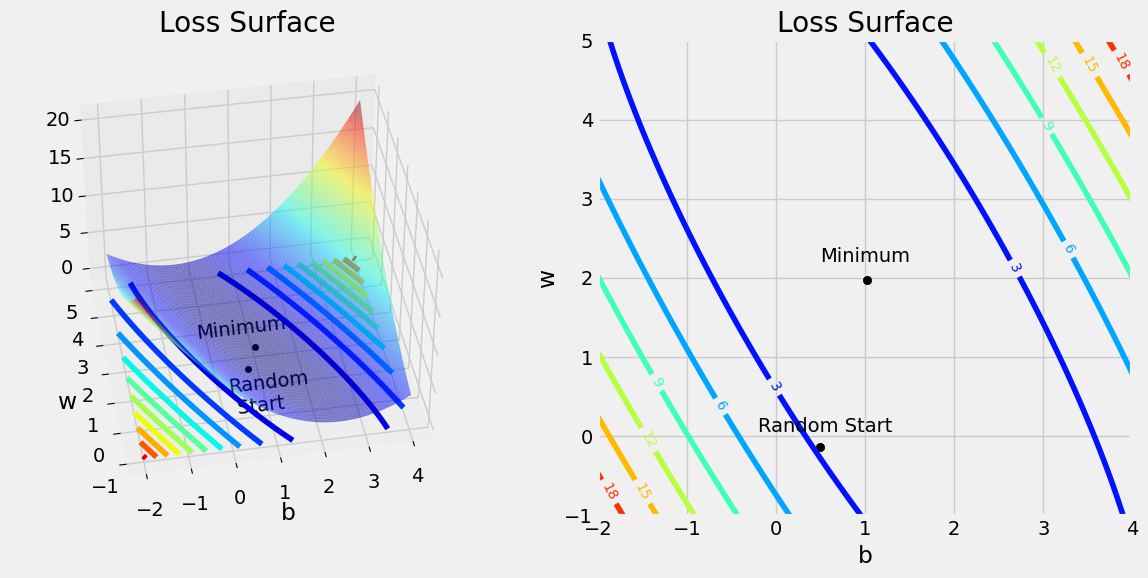

In [57]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

### Cross Sections

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>],
       dtype=object))

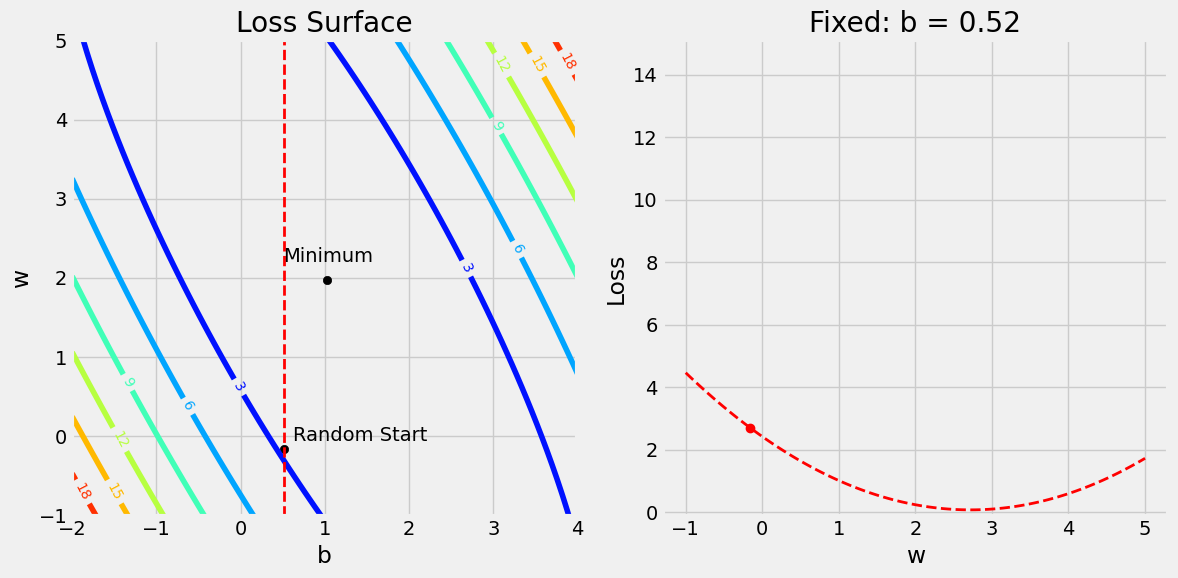

In [58]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

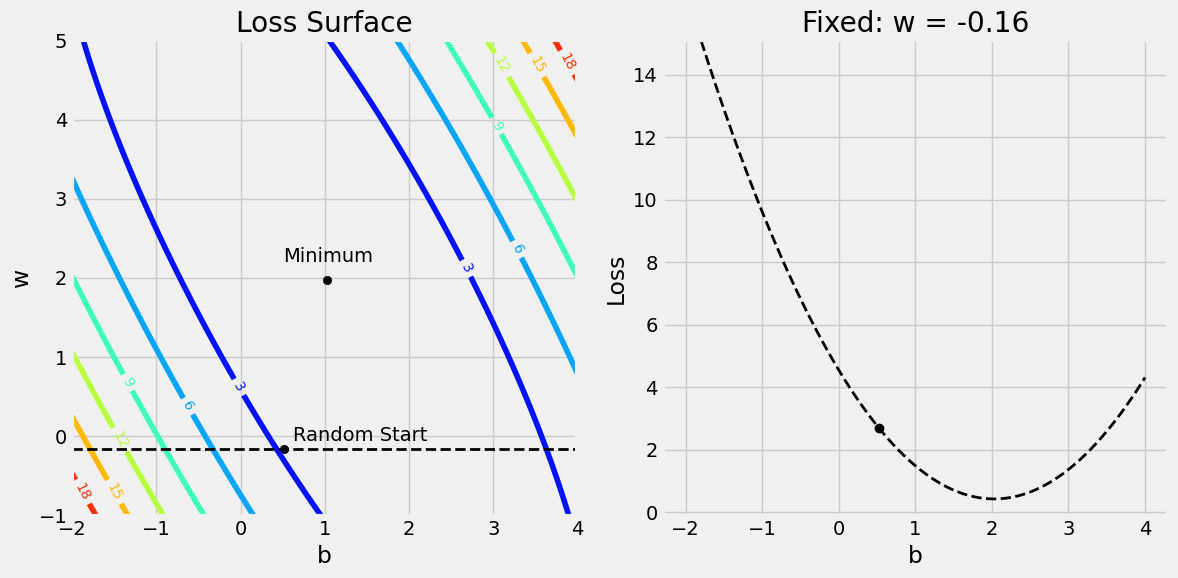

In [59]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

## Step 3: Compute the Gradients

$$
\Large
\begin{aligned}
\frac{\partial{\text{MSE}}}{\partial{b}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{b}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i)} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}
\\
\frac{\partial{\text{MSE}}}{\partial{w}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{w}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i) x_i} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_i (\hat{y_i} - y_i)}
\end{aligned}
$$

In [60]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Visualizing the Gradients

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

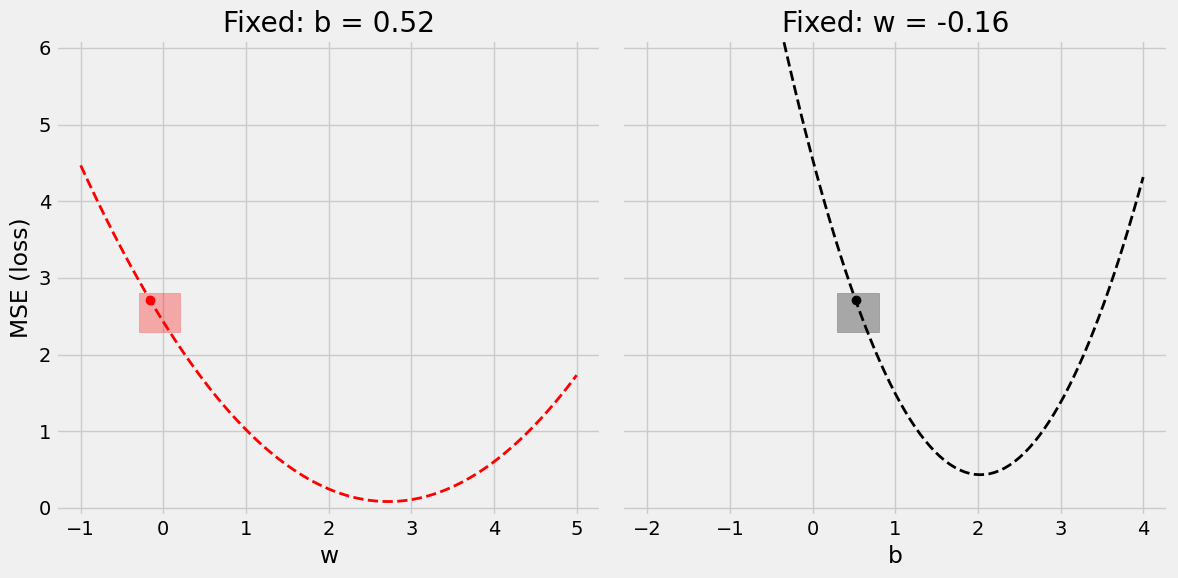

In [61]:
figure7(b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

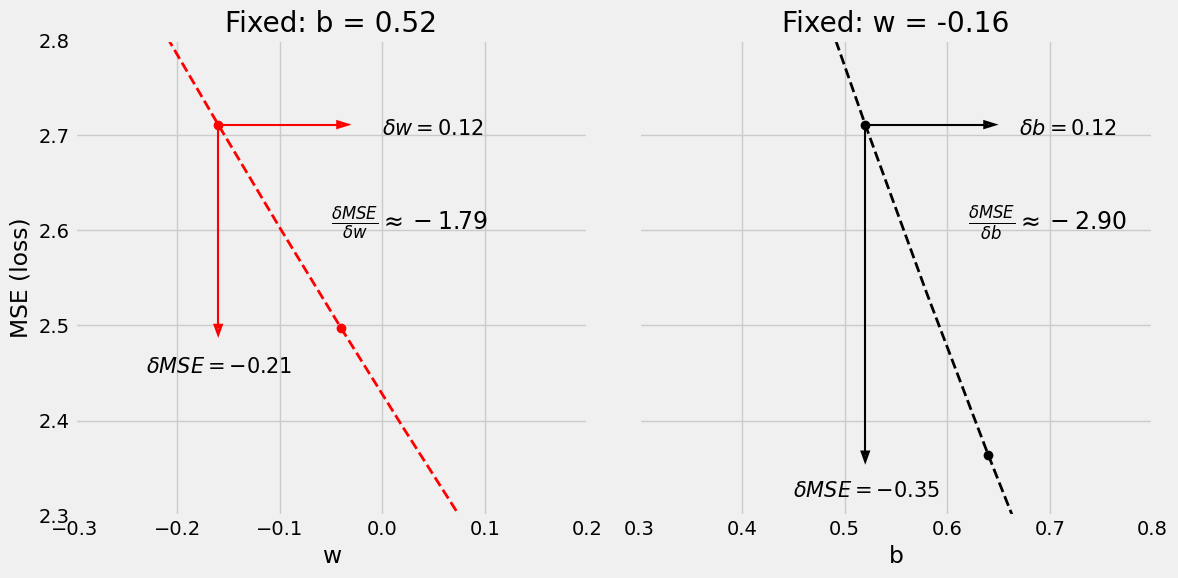

In [62]:
figure8(b, w, bs, ws, all_losses)

### Backpropagation

## Step 4: Update the Parameters

$$
\Large
\begin{aligned}
b &= b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
\\
w &= w - \eta \frac{\partial{\text{MSE}}}{\partial{w}}
\end{aligned}
$$

In [63]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the 
# learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

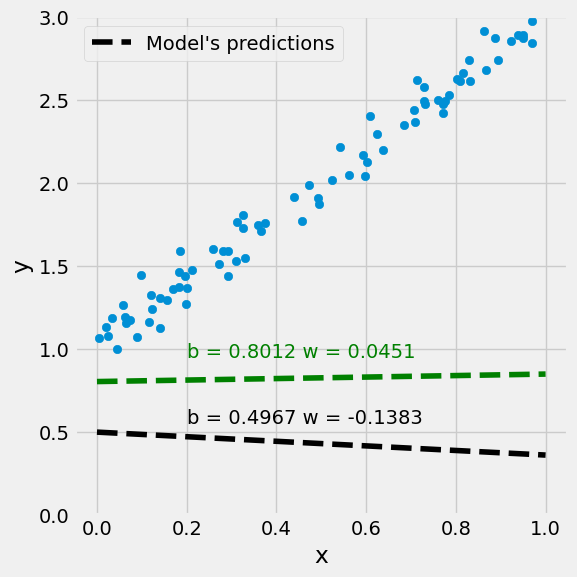

In [64]:
figure9(x_train, y_train, b, w)

### Learning Rate

In [65]:
manual_grad_b = -2.90
manual_grad_w = -1.79

np.random.seed(42)
b_initial = np.random.randn(1)
w_initial = np.random.randn(1)

#### Low Learning Rate

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

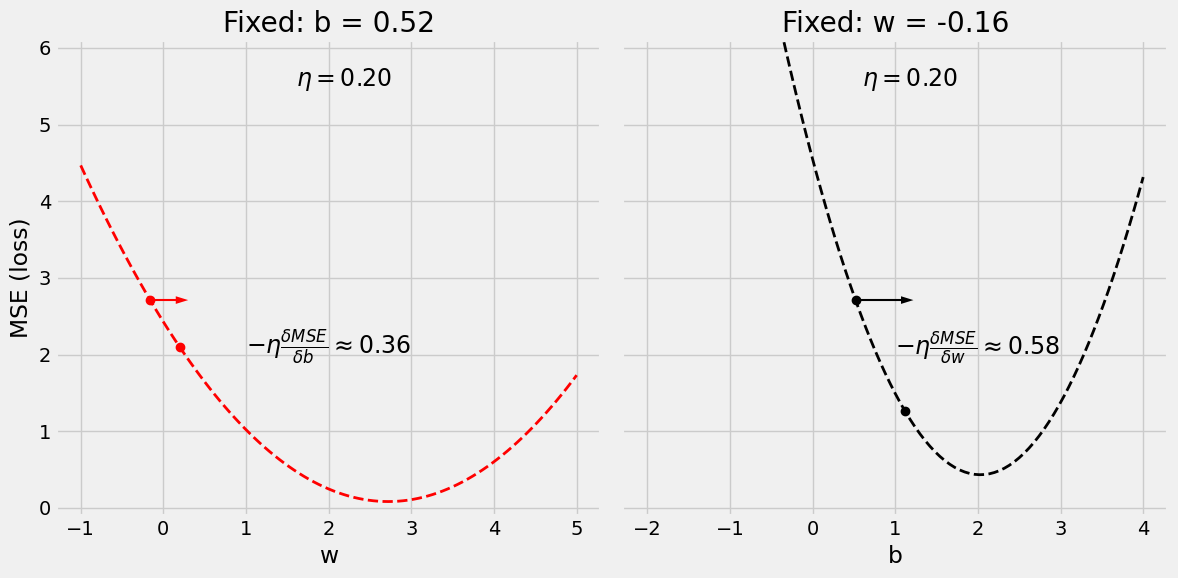

In [66]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .2

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### High Learning Rate

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

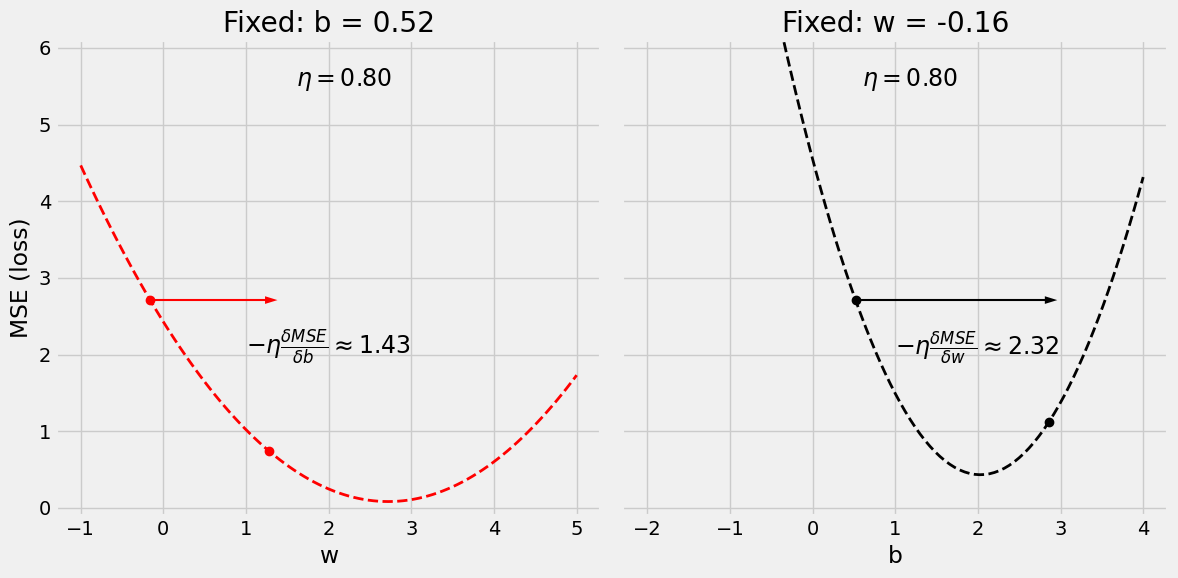

In [67]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .8

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### Very High Learning Rate

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

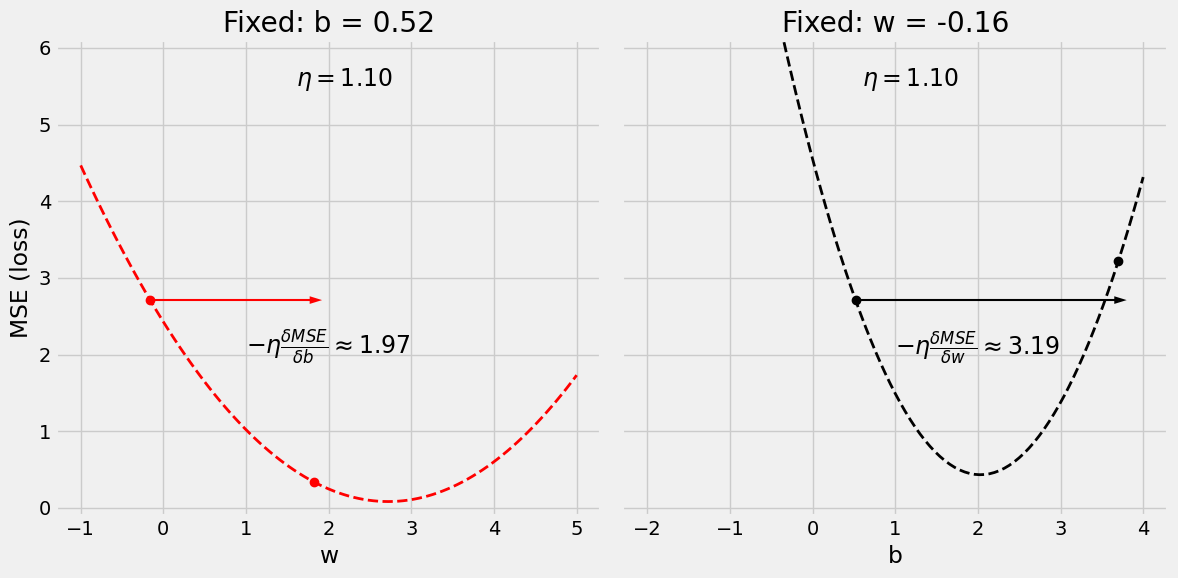

In [68]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = 1.1

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### "Bad" Feature

In [70]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)

# We divide w by 10
bad_w = true_w / 10
# And multiply x by 10
bad_x = np.random.rand(N, 1) * 10

# So, the net effect on y is zero - it is still
# the same as before
y = true_b + bad_w * bad_x + (.1 * np.random.randn(N, 1))

In [71]:
# Generates train and validation sets
# It uses the same train_idx and val_idx as before,
# but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

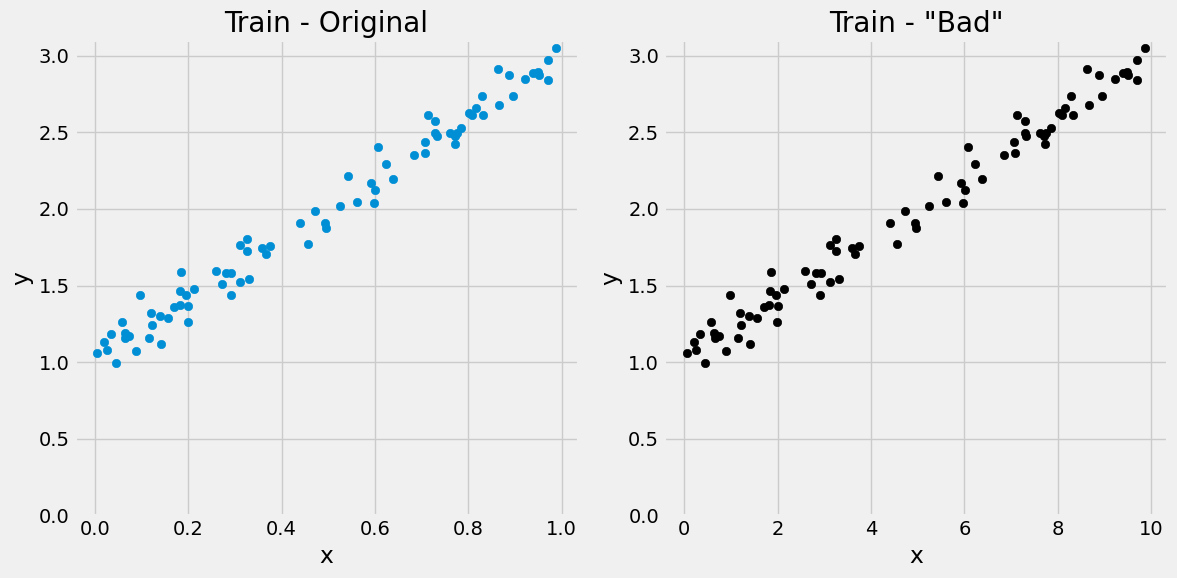

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
fig.tight_layout()

In [73]:
# The ranges CHANGED because we are centering at the new minimum, using "bad" data
bad_b_range = np.linspace(-2, 4, 101)
bad_w_range = np.linspace(-2.8, 3.2, 101)
bad_bs, bad_ws = np.meshgrid(bad_b_range, bad_w_range)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface - Before'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - After'}, xlabel='b', ylabel='w'>],
       dtype=object))

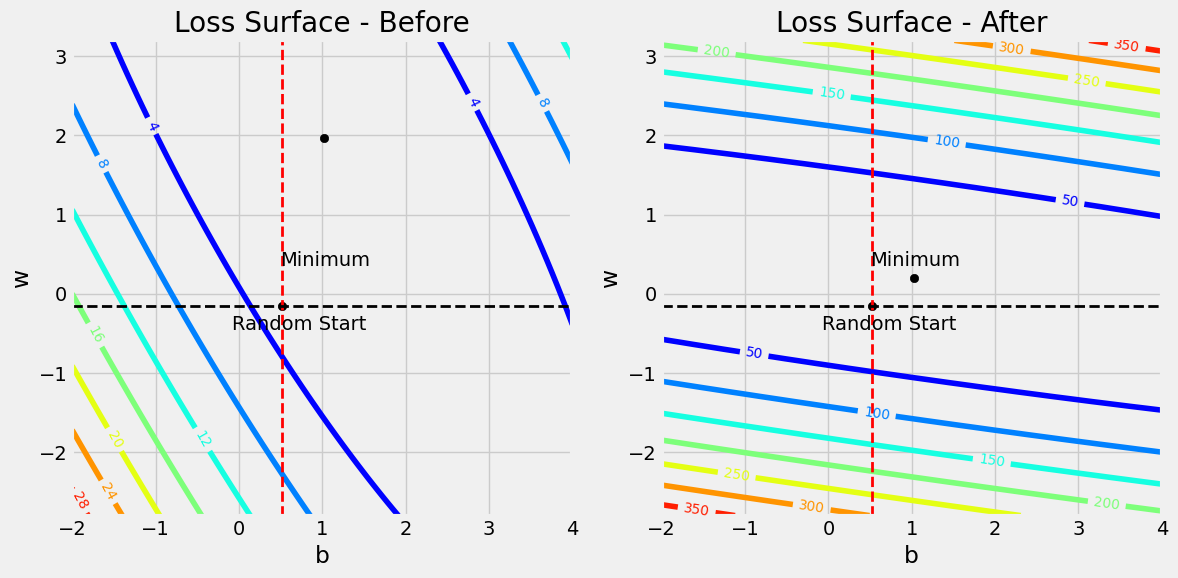

In [74]:
figure14(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

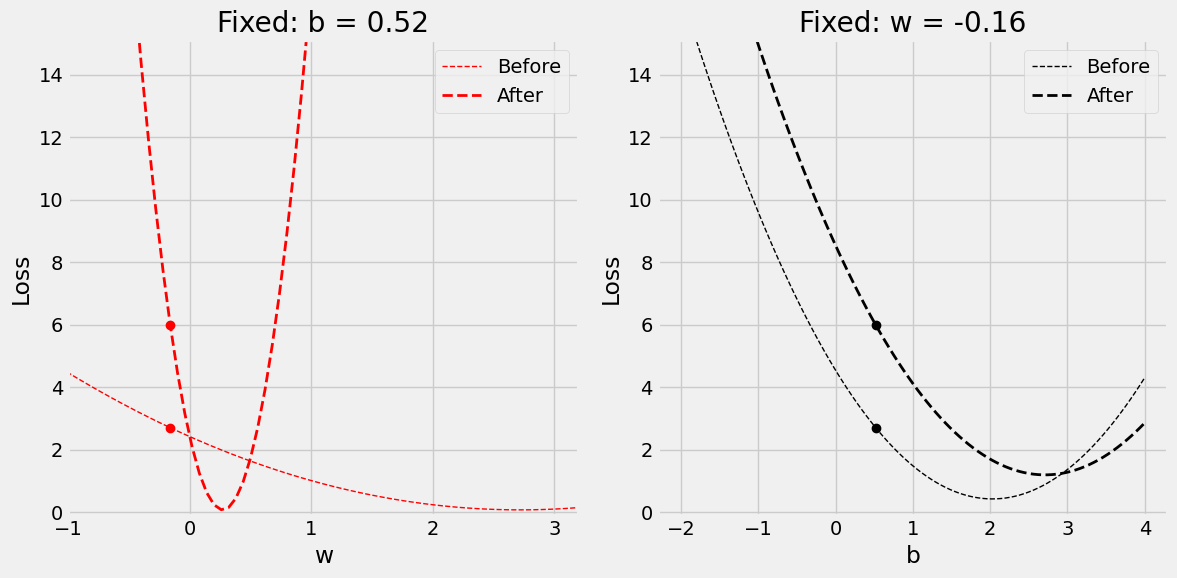

In [75]:
figure15(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

#### Scaling / Standardizing / Normalizing

$$
\Large
\overline{X} = \frac{1}{N}\sum_{i=1}^N{x_i}
\\
\Large
\sigma(X) = \sqrt{\frac{1}{N}\sum_{i=1}^N{(x_i - \overline{X})^2}}
\\
\Large
\text{scaled } x_i=\frac{x_i-\overline{X}}{\sigma(X)}
$$

In [76]:
scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(x_train)

# Now we can use the already fit scaler to TRANSFORM
# both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

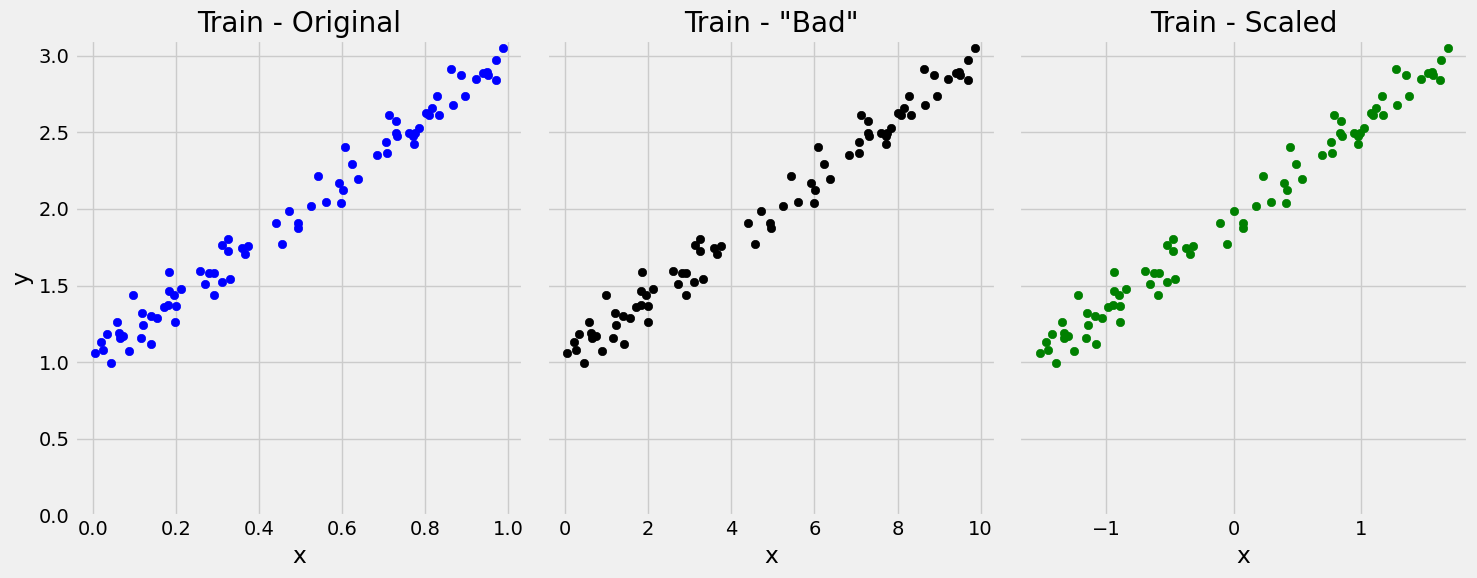

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].scatter(x_train, y_train, c='b')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
ax[1].label_outer()
ax[2].scatter(scaled_x_train, y_train, c='g')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_ylim([0, 3.1])
ax[2].set_title('Train - Scaled')
ax[2].label_outer()

fig.tight_layout()

In [78]:
# The ranges CHANGED AGAIN because we are centering at the new minimum, using "scaled" data
scaled_b_range = np.linspace(-1, 5, 101)
scaled_w_range = np.linspace(-2.4, 3.6, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

(<Figure size 1500x600 with 3 Axes>,
 array([<Axes: title={'center': 'Loss Surface - Original'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - "Bad"'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - Scaled'}, xlabel='b', ylabel='w'>],
       dtype=object))

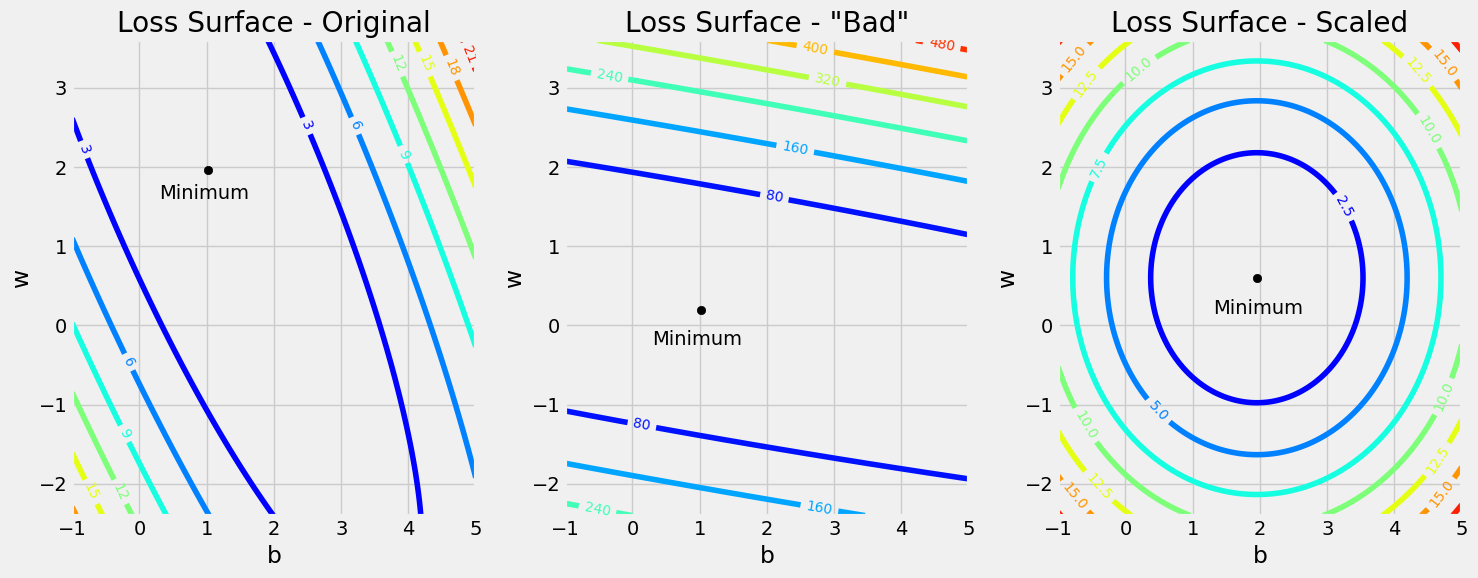

In [79]:
figure17(x_train, y_train, scaled_bs, scaled_ws, bad_x_train, scaled_x_train)

## Step 5: Rinse and Repeat!

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

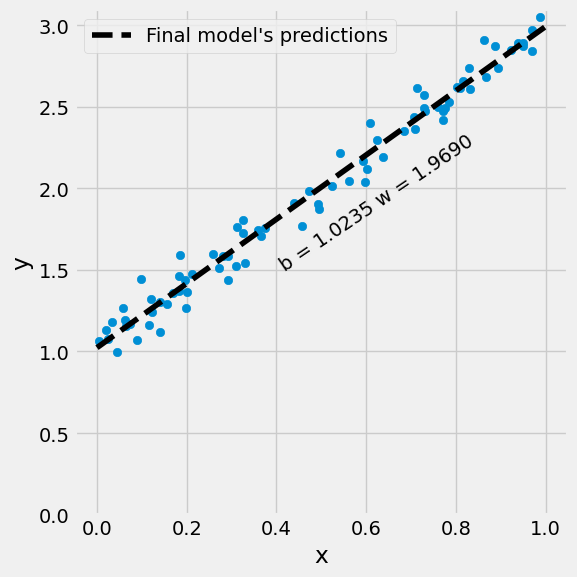

In [80]:
figure18(x_train, y_train)

### The Path of Gradient Descent

Even though the plots are important to illustrate the paths, the corresponding code is beyond the scope of this chapter.

![](images/paths.png)